# <font color='red'>INTRODUCTION:</font>

<font color='maroon'> <font size = 3><font face="verdana">
IMDb which stands for <font color='blue'>Internet Movie Database</font> is a big online database which consists of information about movies, tv shows, documentaries, videos, etc. It was founded by an English software Engineer Needham, the stated founding date of it being October 17, 1990. Immediately after it was developed its emerging popularity helped it to be registered in www in 1996, and also to be established as an independent company with Needham being primary owner as well as the figurehead. Later in 1998, Jeff Bezos bought it for approximately $55 Million and attached it to Amazon as subsidiary private company. As of October 2018, IMDb has approximately 5.3 million titles (including episodes) and 9.3 million personalities in its database,as well as 83 million registered users. There are wide varieties of information we can find in IMDb, it doesn't only tell about movies, but also about its actors, their works, reviews of movies and total votes by movie journalists leading up to those reviews.<br />
In this project we are going to evaluate various unknown facts like top genre of movies and tv shows, and also we are going to evaluate the correation between various factors and the quality of movies and tv shows.</n>
</font> <font color = 'blue'><font size = 3> <a href = "https://en.wikipedia.org/wiki/IMDb">Work Cited </a> <a href = "https://www.britannica.com/topic/IMDb"> Work Cited </a></font> 

In [ ]:
# Import Statements for Various Packages
import pandas as pd;
import sqlalchemy as SQL;
import json

In [5]:
def getCreds(filename,subset,defaults={}):
    '''
    This function helps us connect to a database on hadoop2.  The
    userid password information is stored in a local file encoded
    in json format.  
    Inputs:
        filename is where json encoded userid/password information stored
        subset : dictionary key in json file
        defaults : alternative way to connect to database
    Returns subdictionary based on subset parameter.
    '''
    try:
        with open(filename,'r') as file:
            D = json.load(file)
            file.close()
            if D[subset]:
                return D[subset]
            else:
                return defaults
    except:
        return defaults
    
creds = getCreds('creds.json','mysql',defaults = {'user':'studen_j1', 'password':'studen_j1'})
print(creds)
    
def db_setup(userid,password,database):
    '''
    This function connects us to a database using our login credentials. 
    Paramters:
        userid - string with our userid
        password - string with our password
        database - string with database name
    Return Value:
        SQL engine and SQL connection objects
    '''
    template = 'mysql+mysqlconnector://{}:{}@hadoop2.mathsci.denison.edu/{}'
    cstring = template.format(userid,password,database)
    engine = SQL.create_engine(cstring)
    connection = engine.connect()
    
    return engine, connection
    
creds = getCreds('creds.json','mysql',defaults = {'user':'studen_j1', 'password':'studen_j1'})

{'user': 'basnet_p1', 'password': 'basnet_p1'}


In [6]:
creds = getCreds('creds.json','mysql',defaults = {'user':'studen_j1', 'password':'studen_j1'})
database = 'imdb2'

try:
    connection.close()
    del engine
except:
    pass
engine, connection = db_setup(creds['user'],creds['password'],database)

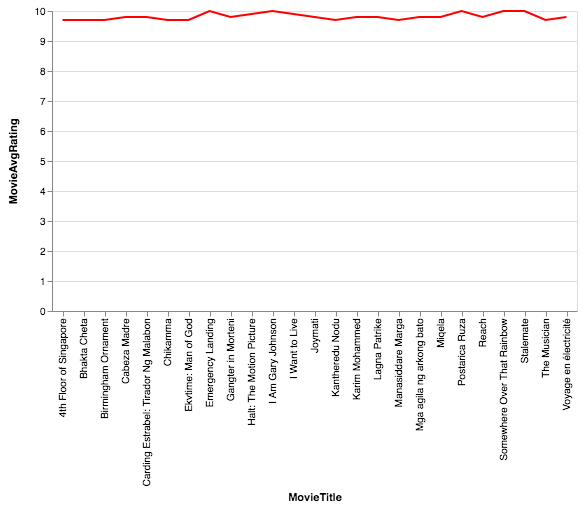

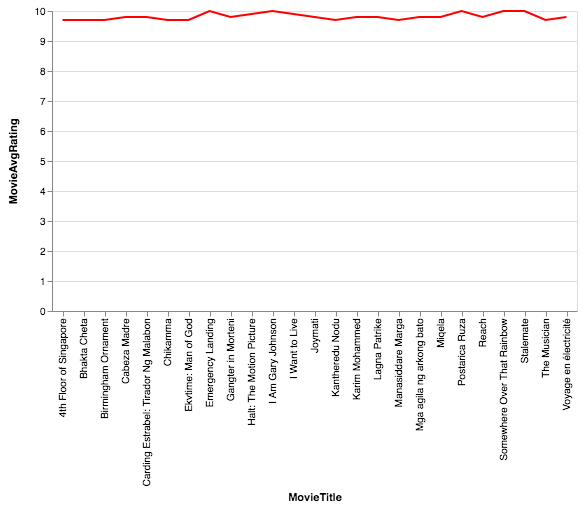

In [18]:
import altair as alt

getMovies = "select Mo.MovieTitle, Mo.MovieAvgRating from Movies as Mo where Mo.MovieAvgRating > 7.5;"
resultproxy = connection.execute(getMovies)
MoviesRatings = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys()) 
MoviesRatings = MoviesRatings.nlargest(25, 'MovieAvgRating')
alt.renderers.enable('notebook')

alt.Chart(MoviesRatings).mark_line(color = 'red').encode(
    x='MovieTitle',
    y='MovieAvgRating',
)

In [ ]:
#This query calculates the total number of movies in each genre and creates the bar graph with total movies made from each genre
import numpy as np
import matplotlib.pyplot as pyplot

getCount = "select Mo.MovieTitle, Ge.Genre from Movies as Mo inner join Movie_Genre as MoGe on Mo.MovieID = MoGe.MovieID inner join Genres as Ge on Ge.GenreID = MoGe.GenreID"
resultproxy = connection.execute(getCount)
MoviesCount = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys()) 
grouped = MoviesCount.groupby(by = 'Genre').agg('count')
grouped.columns = ['NumberOfMovies']
grouped.to_csv("Graph1.csv")

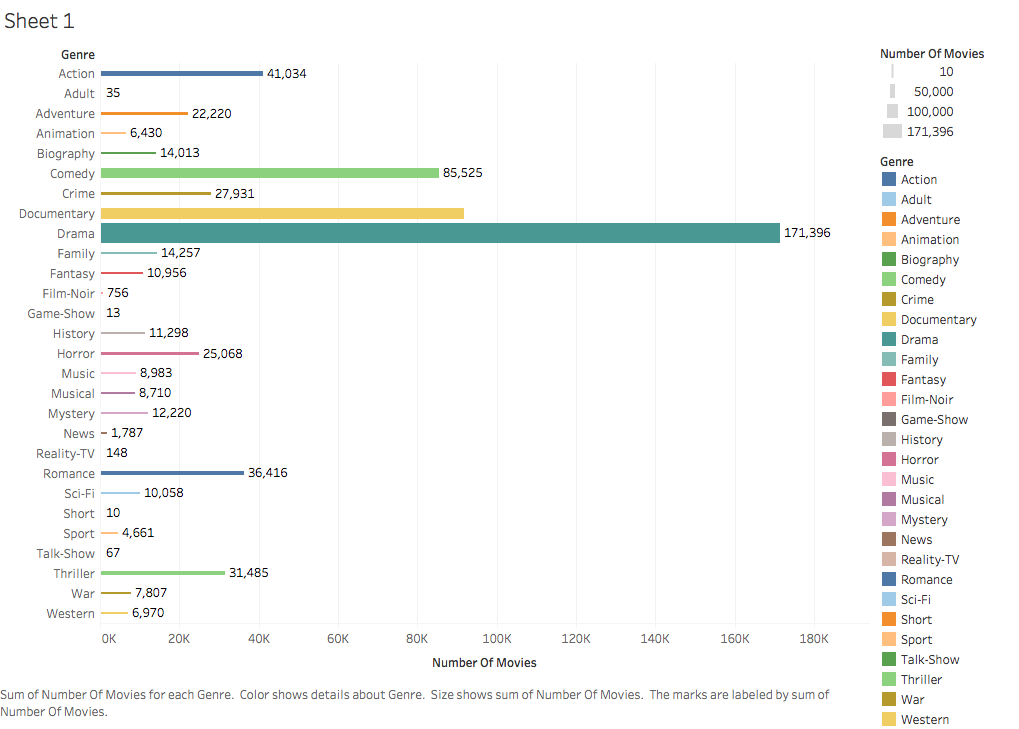

In [ ]:
from PIL import Image
myImage = Image.open("Sheet 1.png");
myImage.show();

In [ ]:
#This query calculates the average ratings of each genre and creates a bar graph using that data
getRatings = "select Mo.MovieTitle, Ge.Genre, Mo.MovieAvgRating from Movies as Mo inner join Movie_Genre as MoGe on Mo.MovieID = MoGe.MovieID inner join Genres as Ge on Ge.GenreID = MoGe.GenreID"
resultproxy = connection.execute(getRatings)
GenresRatings = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys()) 
avgRatings = GenresRatings.groupby(by = 'Genre').agg('mean')

In [ ]:
getTVRatings = "select TVSeries.TVSeriesAvgRating, Genres.Genre from TVSeries inner join TVSeries_Genre on TVSeries.TVSeriesID = TVSeries_Genre.TVSeriesID inner join Genres on Genres.GenreID = TVSeries_Genre.GenreID;"
resultproxy = connection.execute(getTVRatings)
TVGenresRatings = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys())
avgTVRatings = TVGenresRatings.groupby(by = 'Genre').agg('mean')
#avgTVRatings.to_csv("TVRatings.csv")
avgRatings["TVSeriesAvgRating"] = avgTVRatings["TVSeriesAvgRating"]
avgRatings.to_csv("Graph2.csv")

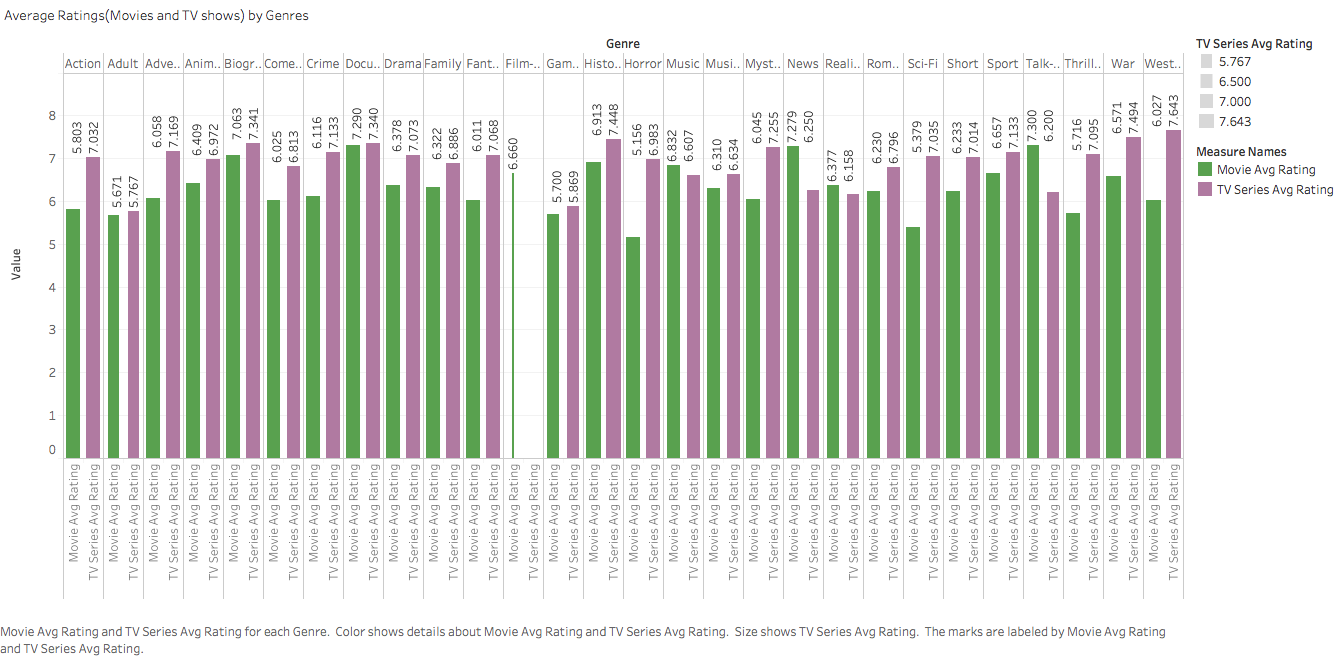

In [ ]:
from PIL import Image
myImage = Image.open("AverageRatings.png");
myImage.show();

In [ ]:
#This query calculates the average ratings over the years
getYears = "select Mo.MovieTitle, Mo.ReleaseYear, Mo.MovieAvgRating from Movies as Mo"
resultproxy = connection.execute(getYears)
Ratings_Per_Year = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys()) 
avg_Year_Ratings = Ratings_Per_Year.groupby(by = 'ReleaseYear').agg('mean')
avg_Year_Ratings = avg_Year_Ratings.sort_values('MovieAvgRating', ascending = False)
avg_Year_Ratings = avg_Year_Ratings.reset_index()
avg_Year_Ratings.to_csv("Graph3.csv")

In [ ]:
from PIL import Image
myImage = Image.open("RatingsYear.png");
myImage.show();

In [ ]:
get_TV_Actors = "select distinct Persons.PersonName, TVSeries.TVSeriesAvgRating from TVSeries inner join Person_TVSeries on Person_TVSeries.TVSeriesID = TVSeries.TVSeriesID inner join Persons on Persons.PersonID = Person_TVSeries.PersonID inner join Person_Profession on Person_Profession.PersonID = Person_TVSeries.PersonID inner join Professions on Person_Profession.ProfessionID = Professions.ProfessionID where Professions.Profession = 'actor'; "
resultproxy = connection.execute(get_TV_Actors)
TV_Actors = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys())

In [ ]:
get_Movie_Actors = "select distinct Persons.PersonName, Movies.MovieAvgRating from Movies inner join Person_Movie on Person_Movie.MovieID = Movies.MovieID inner join Persons on Persons.PersonID = Person_Movie.PersonID inner join Person_Profession on Person_Profession.PersonID = Person_Movie.PersonID inner join Professions on Person_Profession.ProfessionID = Professions.ProfessionID where Professions.Profession = 'actor'; "
resultproxy = connection.execute(get_Movie_Actors)
Movie_Actors = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys())

In [ ]:
#This query shows those actors who played in both movies and TV shows and actors better in TV a/c to ratings
Actors_Both = pd.merge(TV_Actors, Movie_Actors, on = 'PersonName')
Actors_Both_Final = Actors_Both.groupby(by = 'PersonName')[["TVSeriesAvgRating","MovieAvgRating"]].max()
TV_better = Actors_Both_Final[Actors_Both_Final.TVSeriesAvgRating > Actors_Both_Final.MovieAvgRating]
Top_10_TV_Actors = TV_better.nlargest(25, "TVSeriesAvgRating")
Top_10_TV_Actors.to_csv("TVBetter.csv")

In [ ]:
from PIL import Image
myImage = Image.open("TVbetter.png");
myImage.show();

In [ ]:
#This query shows those actors who played in both movies and TV shows and actors better in movies a/c to ratings.
Movie_better = Actors_Both_Final[Actors_Both_Final.TVSeriesAvgRating < Actors_Both_Final.MovieAvgRating]
Top_10_Movie_Actors = Movie_better.nlargest(25, "MovieAvgRating")
Top_10_Movie_Actors.to_csv("MovieBetter.csv")

In [ ]:
from PIL import Image
myImage = Image.open("Moviebetter.png");
myImage.show();

In [ ]:
get_Movie_Actors_Years = "select Persons.BirthYear, Persons.DeathYear, Movies.MovieAvgRating from Persons inner join Person_Movie on Persons.PersonID = Person_Movie.PersonID inner join Movies on Movies.MovieID = Person_Movie.MovieID limit 100;"
resultproxy = connection.execute(get_Movie_Actors_Years)
Age_Movie_Actors = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys())
Age_Difference = Age_Movie_Actors.DeathYear - Age_Movie_Actors.BirthYear
Age_Movie_Actors['Age of Actors'] = Age_Difference
Age_Movie_Actors.to_csv("AgeMovieActors.csv")

In [1]:
pyplot.plot(Age_Movie_Actors["MovieAvgRating"],Age_Movie_Actors["Age of Actors"])

NameError: name 'pyplot' is not defined

In [ ]:
get_Movies_Act = "select distinct Persons.PersonName, Movies.MovieTitle, Movies.MovieAvgRating, Professions.Profession from Movies inner join Person_Movie on Movies.MovieID = Person_Movie.MovieID inner join Persons on Persons.PersonID = Person_Movie.PersonID inner join Person_Profession on Person_Profession.PersonID = Persons.PersonID inner join Professions on Professions.ProfessionID = Person_Profession.ProfessionID where Professions.Profession = 'actor' or Professions.Profession = 'director';"
resultproxy = connection.execute(get_Movies_Act)
Movie_Actors = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys())
print(Movie_Actors)


In [ ]:
get_Movies_Direc = "select distinct Persons.PersonName, Movies.MovieTitle, Movies.MovieAvgRating, Professions.Profession from Movies inner join Person_Movie on Movies.MovieID = Person_Movie.MovieID inner join Persons on Persons.PersonID = Person_Movie.PersonID inner join Person_Profession on Person_Profession.PersonID = Persons.PersonID inner join Professions on Professions.ProfessionID = Person_Profession.ProfessionID where Professions.Profession = 'director';"
resultproxy = connection.execute(get_Movies_Direc)
Movie_Directors = pd.DataFrame(resultproxy.fetchall(), columns = resultproxy.keys())
Movie_Directors = Movie_Directors.groupby(by = 'MovieTitle')
print(Movie_Directors)

In [ ]:
common_act_direc = pd.merge(Movie_Directors, Movie_Actors, on = 'MovieTitle', how = 'inner')
#common_act_direc = common_act_direc.nlargest(100, 'MovieAvgRating')
print(common_act_direc)